In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from helper import *


In [2]:
label="2021-07-22-runs/run_hom"
gid="0.0"
pop= "PNs"
N= 800
spike_t= np.load(label+"_"+gid+"_"+pop+"_spike_t.npy")
spike_ID= np.load(label+"_"+gid+"_"+pop+"_spike_ID.npy")
t_total= spike_t[-1]

In [47]:
mlabel="2021-07-22-runs/run_hom_0.0_odors_0_1"
mspike_t= np.load(mlabel+"_"+pop+"_spike_t.npy")
mspike_ID= np.load(mlabel+"_"+pop+"_spike_ID.npy")
mt_total= mspike_t[-1]

In [48]:
trial_time= 12000
ORN_cnts= np.load("2021-07-22-runs/run_hom_ORNs_spike_counts.npy")
avgNo= int(trial_time/2000)  # 2000 is the time for each recording window
d= np.zeros(ORN_cnts.shape[0]//avgNo)
for i in range(ORN_cnts.shape[0]//avgNo):
    d[i]= np.sum(ORN_cnts[i*avgNo:(i+1)*avgNo])
print(d)

[ 83216. 144112. 254221. 340900. 404591. 257657. 317778. 412115. 440051.
 431569. 731784. 787936. 866209. 870700. 803377.]


In [43]:
def force_aspect(ax,aspect):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)



In [44]:
def glo_avg(sdf: np.ndarray, n):
    nglo= sdf.shape[1]//n
    gsdf= np.zeros((sdf.shape[0],nglo))
    for i in range(nglo):
        gsdf[:,i]= np.mean(sdf[:,n*i:n*(i+1)],axis=1)
    return gsdf

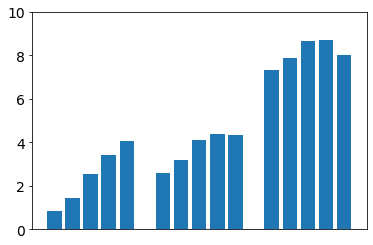

In [60]:
plt.rc('font', size=14) #controls default text size
plt.figure()
plt.bar(np.hstack([np.arange(0,5),np.arange(6,11),np.arange(12,17)]),d)
ax=plt.gca()
ax.set_xticks([])
ax.set_yticks(np.arange(0,1.1e6,2e5))
ax.set_yticklabels(np.arange(0,11,2))
ax.set_ylim([0,1e6])
plt.savefig("ORN_response.png", dpi=300)

In [12]:
trial_time= 12000
cnum= 25
batch_t= cnum*trial_time
wds= int(t_total//batch_t) # corresponds to number of odours presented / number of batches
print(wds)
li= 0
sigma_sdf= 100
dt_sdf= 1
lsdfs= []
gsdfs= []
# Let's look at the two odors "IAA" and "Geosmin"
ichoice= [ 0, 1 ]
jchoice= [[ 16, 24 ], [ 4, 16 ]]
for k in range(2):
    i= ichoice[k]
    # let's look at two example concentrations each
    for j in jchoice[k]:
        left= i*batch_t+j*trial_time
        right= left+trial_time
        while li < len(spike_t) and spike_t[li] < left:
            li+= 1
        ri= li
        while ri < len(spike_t) and spike_t[ri] < right:
            ri+= 1
        lsdfs.append(make_sdf(spike_t[li:ri], spike_ID[li:ri], np.arange(0,N), left-3*sigma_sdf, right+3*sigma_sdf, dt_sdf, sigma_sdf))
        gsdfs.append(glo_avg(lsdfs[-1],5))

100


In [13]:
meansdf= np.zeros((2,gsdfs[0].shape[1]))
for i in range(2):
    for k in range(2):
        meansdf[i,:]+= np.mean(gsdfs[i*2+k],axis=0)
mxid= np.argmax(meansdf, axis= 1)  # this is the strongest glomerulus over all 2 concentrations
print(mxid)

[ 25 143]


In [22]:
batch_t= cnum*trial_time
wds= int(t_total//batch_t) # corresponds to number of odours presented / number of batches
li= 0
sigma_sdf= 100
dt_sdf= 1
mlsdfs= []
mgsdfs= []
# Let's look at two odors
i= 24
# let's look at two example concentrations for geosmin
for j in [ 4, 16 ]:
    left= i*batch_t+j*trial_time
    right= left+trial_time
    while li < len(mspike_t) and mspike_t[li] < left:
        li+= 1
    ri= li
    while ri < len(mspike_t) and mspike_t[ri] < right:
        ri+= 1
    mlsdfs.append(make_sdf(mspike_t[li:ri], mspike_ID[li:ri], np.arange(0,N), left-3*sigma_sdf, right+3*sigma_sdf, dt_sdf, sigma_sdf))
    mgsdfs.append(glo_avg(mlsdfs[-1],5))
print(mgsdfs[0].shape)

(13200, 160)


(6,)


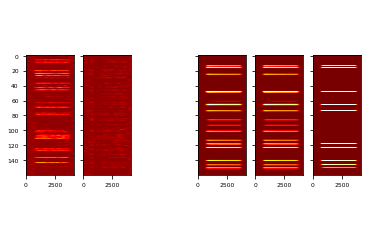

In [61]:
plt.rc('font', size=6) #controls default text size
mn= [-5, -40]
mx= [20, 200]
fig, ax= plt.subplots(1,6)
print(ax.shape)
ts= np.transpose(gsdfs[2][2900:7000,:])
ax[0].imshow(ts, vmin=mn[0], vmax=mx[0], cmap="hot")
force_aspect(ax[0],0.4)
ts= np.transpose(gsdfs[3][2900:7000,:])
ax[1].imshow(ts, vmin=mn[0], vmax=mx[0], cmap="hot")
force_aspect(ax[1],0.4)
ax[1].set_yticklabels([])
ts= np.transpose(gsdfs[1][2900:7000,:])
ax[2].set_axis_off()
ax[3].imshow(ts, vmin=mn[1],vmax=mx[1], cmap="hot")
force_aspect(ax[3],0.4)
ax[3].set_yticklabels([])
ts= np.transpose(mgsdfs[0][2900:7000,:])
ax[4].imshow(ts, vmin=mn[1], vmax=mx[1], cmap="hot")
force_aspect(ax[4],0.4)
ax[4].set_yticklabels([])
ts= np.transpose(mgsdfs[1][2900:7000,:])
ax[5].imshow(ts, vmin=mn[1], vmax=mx[1], cmap="hot",interpolation="None")
force_aspect(ax[5],0.4)
ax[5].set_yticklabels([])
plt.savefig("response_ex.png",dpi=300)

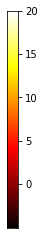

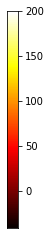

In [35]:
plt.rc('font', size=10) #controls default text size
for i in range(2):
    plt.figure()
    ax= plt.gca()
    ax.imshow(np.reshape(np.arange(0,100),(-1,1)),cmap='hot')
    if i==0: 
        yticks= np.arange(0,mx[0]+1,5)
    else:
        yticks= np.arange(0,mx[1]+1,50)
    ytick_pos= (yticks-mn[i])/(mx[i]-mn[i])*100
    ax.invert_yaxis()
    ax.yaxis.tick_right()
    ax.set_xticks([])
    ax.set_yticks(ytick_pos)
    ax.set_yticklabels(yticks)
    force_aspect(ax,0.05)
    plt.savefig("colorbar"+str(i)+".png",dpi=300)